The function is 

$$ y = a x + b $$

where y is the final predicted value, a is the slope (or weight), x is the input feature, b is the intercept (or bias).


$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

$( y_i - \hat{y}_i)^2 $ is the squared difference between the he actual value $y$ and  predicted value $\hat{y}$.


The weight updates use the standard gradient descent formula:

$$ a_0 \leftarrow a_0 + \frac{2}{n} \cdot \text{learning rate} \cdot \sum (\text{error}) $$

$$ a_1 \leftarrow a_1 + \frac{2}{n} \cdot \text{learning rate} \cdot \sum (\text{error} \times X) $$






Epoch 0, MSE: 1969.3751, a_0: 0.07269821772595357, a_1: 0.47723436108959577
Epoch 10, MSE: 584.0222, a_0: 0.5989951088517825, a_1: 3.9382358973150544
Epoch 20, MSE: 176.8533, a_0: 0.8828188783744537, a_1: 5.8147919353349495
Epoch 30, MSE: 57.1819, a_0: 1.0351995361569135, a_1: 6.8323647369226785
Epoch 40, MSE: 22.0086, a_0: 1.1163301586512824, a_1: 7.38425205140439
Epoch 50, MSE: 11.6700, a_0: 1.1588433939542366, a_1: 7.6836739606347
Epoch 60, MSE: 8.6307, a_0: 1.1804304460084745, a_1: 7.846224324772566
Epoch 70, MSE: 7.7367, a_0: 1.1906822546625695, a_1: 7.934570512304907
Epoch 80, MSE: 7.4732, a_0: 1.1947983318061683, a_1: 7.982686642355456
Epoch 90, MSE: 7.3951, a_0: 1.1955974474430104, a_1: 8.008991248659392
Launching Animation...


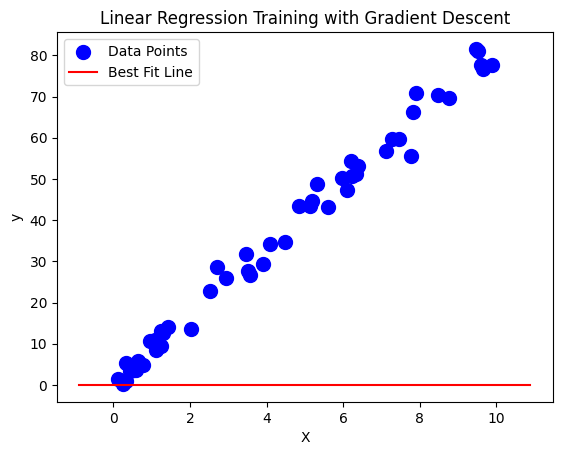

Saving animation as linear_regression_animation.mp4...
Animation saved to linear_regression_animation.mp4!


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

def main():
    # Initialize dataset with noise
    X = 10 * np.random.rand(50)  # 50 random points in the range [0, 10]
    y = 8 * X + 1 + 2.5 * np.random.randn(50)  # Linear relation with noise

    # Create and train the linear regression model
    model = LinearRegression()
    model.train(X, y)

    # Animate the gradient descent process
    model.animate(X, y)



    # Save the animation
    model.save_animation('linear_regression_animation.mp4')  # Save as .mp4


class LinearRegression:
    """
    Simple Linear Regression model using Gradient Descent
    """

    def __init__(self, learning_rate=0.001, epochs=100):
        """
        Initializes the Linear Regression model.

        Parameters:
        - learning_rate: Step size for gradient descent.
        - epochs: Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.a_0 = 0  # Intercept (bias)
        self.a_1 = 0  # Slope (weight)
        self.w_list = []  # List to store parameters during training

    def train(self, X, y):
        """
        Train the model using Gradient Descent.

        Parameters:
        - X: Input features (independent variable).
        - y: True labels (dependent variable).
        """
        n = X.shape[0]  # Number of data points

        for i in range(self.epochs):
            # Store parameters (weights) at each step
            self.w_list.append([self.a_0, self.a_1])

            # Predictions based on current weights
            y_pred = self.a_0 + self.a_1 * X

            # Calculate the error (difference between predictions and actual values)
            error = y - y_pred
            mse = np.mean(error ** 2)  # Mean Squared Error

            # Update weights (gradient descent step)
            self.a_0 += 2 * self.learning_rate * np.sum(error) / n
            self.a_1 += 2 * self.learning_rate * np.sum(error * X) / n

            # Optionally print MSE at intervals for debugging (e.g. every 10 epochs)
            if i % 10 == 0:
                print(f"Epoch {i}, MSE: {mse:.4f}, a_0: {self.a_0}, a_1: {self.a_1}")

        self.w_list = np.array(self.w_list)  # Convert to numpy array for easy indexing

    def animate(self, X, y):
        """
        Animate the gradient descent process, showing how the model's fit improves.
        
        Parameters:
        - X: Input features (independent variable).
        - y: True labels (dependent variable).
        """
        fig, ax = plt.subplots()
        ax.scatter(X, y, color='blue', label='Data Points', s=100)

        # Define the plot range (for drawing the regression line)
        plot_range = np.linspace(min(X) - 1, max(X) + 1, 100)

        # Create the initial line with the first parameters (weights)
        a_0, a_1 = self.w_list[0]
        y_plot = a_0 + a_1 * plot_range
        line, = ax.plot(plot_range, y_plot, color='red', label="Best Fit Line")

        # Animation function to update the line during training
        def update_line(frame):
            a_0, a_1 = self.w_list[frame]
            y_plot = a_0 + a_1 * plot_range
            line.set_ydata(y_plot)  # Update the y-data of the line
            return line,

        # Set up the animation using FuncAnimation
        print("Launching Animation...")
        self.anim = animation.FuncAnimation(fig, update_line, frames=self.epochs, interval=50, blit=True)

        # Show the plot with animation
        ax.legend()
        plt.xlabel("X")
        plt.ylabel("y")
        plt.title("Linear Regression Training with Gradient Descent")
        plt.show()

        

    def save_animation(self, filename, writer='ffmpeg', fps=30):
        """
        Save the animation to a file (e.g., .mp4, .gif).

        Parameters:
        - filename: The name of the file (including extension, e.g., 'animation.mp4').
        - writer: The writer to use for saving the animation. 'ffmpeg' for .mp4 or 'imagemagick' for .gif.
        - fps: Frames per second for the saved video or GIF.
        """
        print(f"Saving animation as {filename}...")
        self.anim.save(filename, writer=writer, fps=fps)
        print(f"Animation saved to {filename}!")


if __name__ == "__main__":
    main()


In [10]:
!open linear_regression_animation.mp4